In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
payload_frame = pd.read_csv("jsonAllPayloadsNew.csv", sep='\t')
payload_frame.head()

payload_frame.isnull().any()


payload_frame.dropna(inplace=True)
payload_frame.isnull().sum()

Payload = payload_frame["Payload"].astype(str)
Classification = payload_frame["Type"].astype(str)
Set1_train, Set1_test, Set2_train, Set2_test = train_test_split(
    Payload, Classification, test_size=0.2, random_state=555 , shuffle=True)


for index, row in payload_frame.iterrows():
    print(row["Payload"])
    if index > 10 :
        break

Payload.count()

Set1_train.count()
Set2_train.count()

{"postedBy": "http:3H6k7lIAiqjfNeN@00330.00072.0000326.00000316", "content": "http:3H6k7lIAiqjfNeN@00330.00072.0000326.00000316", "postedOn": "http:3H6k7lIAiqjfNeN@00330.00072.0000326.00000316"}
{"postedBy": "/https:///www.google.com/%2f%2e%2e", "content": "/https:///www.google.com/%2f%2e%2e", "postedOn": "/https:///www.google.com/%2f%2e%2e"}
{"postedBy": "15365381r", "content": "15365381r", "postedOn": "15365381r"}
{"postedBy": "/https://example.com/%2e%2e", "content": "/https://example.com/%2e%2e", "postedOn": "/https://example.com/%2e%2e"}
{"postedBy": "<input2 onpointerdown=alert(1)>XSS</input2>", "content": "<input2 onpointerdown=alert(1)>XSS</input2>", "postedOn": "<input2 onpointerdown=alert(1)>XSS</input2>"}
{"postedBy": "http://[::216.58.214.206]", "content": "http://[::216.58.214.206]", "postedOn": "http://[::216.58.214.206]"}
{"postedBy": "%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5c{FILE}", "content": "%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5c%2e%2e%5

43293

In [3]:
model_pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content',lowercase=True , analyzer='char', max_features=2048)),
    ('SVC' , SVC())

    ])

parameters = {'tfidf__ngram_range': [ (1, 2) , (1,3) , (2,2), (1,4)] ,
              'SVC__kernel':('linear', 'rbf' ), 'SVC__C':[1, 10 , 100]
              }

grid_search = GridSearchCV(model_pipe, parameters, n_jobs=10 , cv=2,  verbose=4 )
grid_search.fit(Set1_train,Set2_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END SVC__C=1, SVC__kernel=linear, tfidf__ngram_range=(1, 3);, score=0.904 total time=35.9min
[CV 2/2] END SVC__C=10, SVC__kernel=linear, tfidf__ngram_range=(1, 3);, score=0.932 total time=23.1min
[CV 1/2] END SVC__C=100, SVC__kernel=linear, tfidf__ngram_range=(1, 3);, score=0.945 total time=17.8min


/home/sripada/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/2] END SVC__C=1, SVC__kernel=linear, tfidf__ngram_range=(1, 4);, score=0.885 total time=39.5min
[CV 2/2] END SVC__C=10, SVC__kernel=rbf, tfidf__ngram_range=(1, 2);, score=0.967 total time= 9.3min
[CV 2/2] END SVC__C=10, SVC__kernel=rbf, tfidf__ngram_range=(1, 4);, score=0.954 total time=29.3min
[CV 1/2] END SVC__C=1, SVC__kernel=linear, tfidf__ngram_range=(1, 2);, score=0.915 total time=14.4min
[CV 2/2] END SVC__C=1, SVC__kernel=rbf, tfidf__ngram_range=(2, 2);, score=0.954 total time=12.4min
[CV 2/2] END SVC__C=10, SVC__kernel=linear, tfidf__ngram_range=(1, 2);, score=0.946 total time= 9.8min
[CV 2/2] END SVC__C=10, SVC__kernel=linear, tfidf__ngram_range=(1, 4);, score=0.916 total time=24.5min
[CV 2/2] END SVC__C=100, SVC__kernel=linear, tfidf__ngram_range=(1, 3);, score=0.945 total time=17.2min
[CV 2/2] END SVC__C=1, SVC__kernel=linear, tfidf__ngram_range=(2, 2);, score=0.935 total time=11.3min
[CV 2/2] END SVC__C=1, SVC__kernel=rbf, tfidf__ngram_range=(1, 3);, score=0.926 total

[[3719   66]
 [ 121 6918]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3785
           1       0.99      0.98      0.99      7039

    accuracy                           0.98     10824
   macro avg       0.98      0.98      0.98     10824
weighted avg       0.98      0.98      0.98     10824



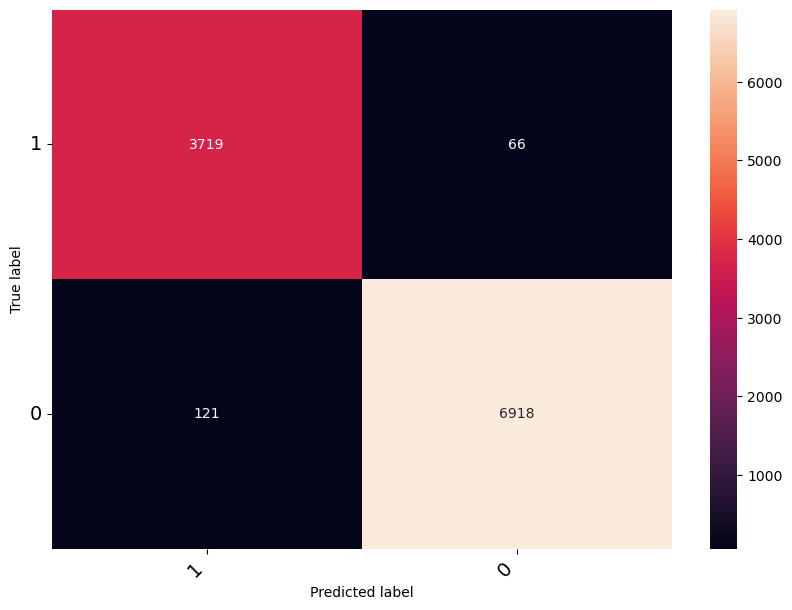

In [4]:
model_pipe = Pipeline([
    ('tfidf' ,  TfidfVectorizer(input='content', ngram_range=(1,2), lowercase=True , analyzer='char', max_features=5000)),
    ('SVC' , SVC(kernel='rbf', C=10))
    ])

model_pipe.fit(Set1_train, Set2_train)

accuracy_score(Set2_test,model_pipe.predict(Set1_test))

set2_predict = model_pipe.predict(Set1_test)

cf_matrix = confusion_matrix(Set2_test , set2_predict)
print(cf_matrix)

from sklearn.metrics import classification_report
print(classification_report(Set2_test, set2_predict))

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    # from https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig


labels = Set2_test.unique().tolist()
print_confusion_matrix(cf_matrix, class_names=labels);

with open("svm.model", "wb") as f:
    pickle.dump(model_pipe , f)